In [3]:
# Exploratory Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from tqdm import tqdm

# Process data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Machine Leaning Models
from sklearn.linear_model import LinearRegression       # Linear Regression
from sklearn.tree     import DecisionTreeRegressor      # Decision Tree
from sklearn.ensemble import RandomForestRegressor      # Random Forest
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting (sklearn)
import lightgbm as lgb                                  # Gradient Boosting (lightgbm)

from fastai2.tabular import * 
from fastai2.data.all import *
from fastai2.tabular.core import *
from fastai2.tabular.model import *
from fastai2.optimizer import *
from fastai2.learner import *
from fastai2.metrics import *
from fastai2.callback.all import *

# Metrics & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 1000) # Display all variables

In [2]:
df = pd.read_csv("../data/kaggle_melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Target

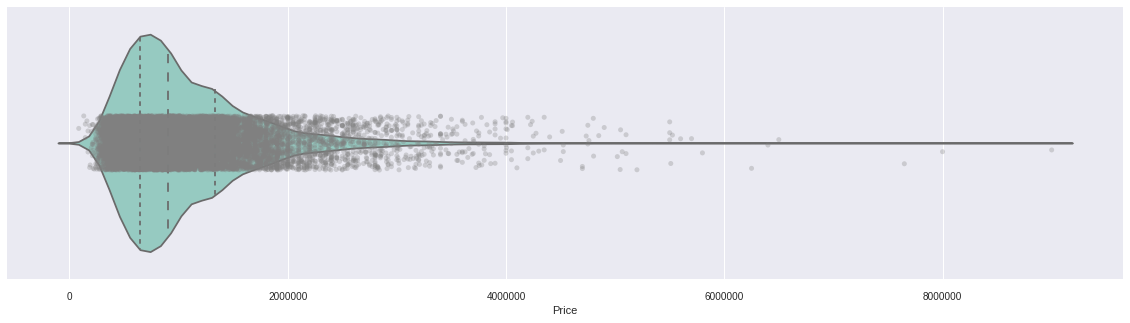

In [3]:
def ditribution(variable, size):
    plt.figure(figsize=size)
    sns.violinplot(variable, palette="Set3", inner="quart" )
    sns.stripplot(variable, color="grey", alpha=.3);

ditribution(df.Price, size=(20,5))

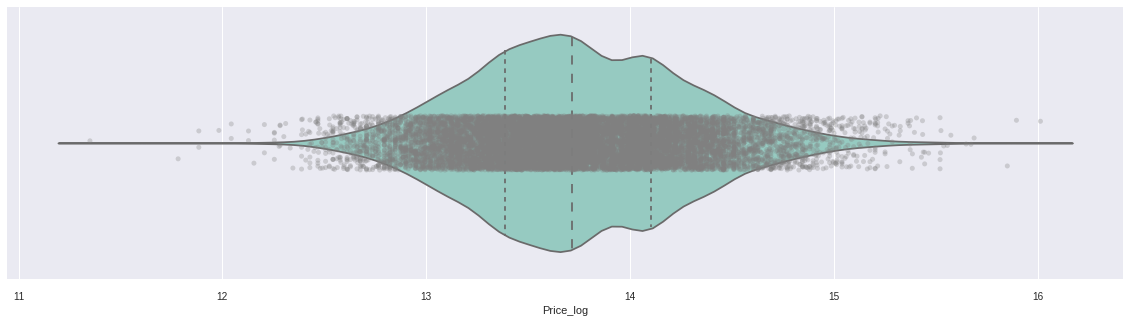

In [4]:
df["Price_log"] = np.log1p(df.Price)
ditribution(df.Price_log, size=(20,5))

# Validation set

In [7]:
x = df[num]
y = df.Price

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=0)

# Categorical variables

In [21]:
df.Date = pd.to_datetime(df.Date)

In [26]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns
num = num.drop("Price")
num = num.drop("Price_log")

print("Numerical features:  ", len(num))
print("Categorical features:", len(cat))
print("Date/time features:  ", len(time))

Numerical features:   12
Categorical features: 7
Date/time features:   1


In [23]:
df[cat].head()

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,Yarra,Northern Metropolitan


In [30]:
carinality = df[cat].nunique()
carinality

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
CouncilArea       33
Regionname         8
dtype: int64

In [43]:
carinality[carinality <= 20].index

Index(['Type', 'Method', 'Regionname'], dtype='object')

In [44]:
carinality[carinality > 20].index

Index(['Suburb', 'Address', 'SellerG', 'CouncilArea'], dtype='object')

In [ ]:
# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

# Missings

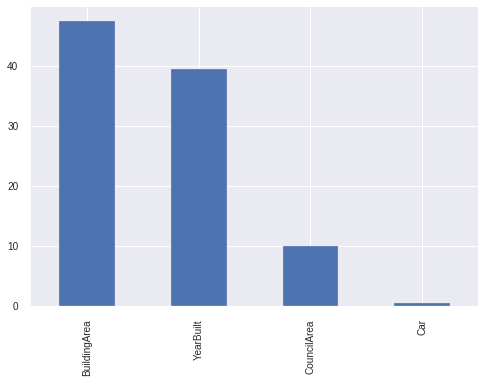

In [8]:
def plot_missings(df):
    missing = df.isnull().sum()
    missing = missing/df.isnull().count()*100
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)
    missing.plot.bar()
    
plot_missings(df)

In [9]:


# Remove rows with missings
#df = df.dropna(axis=0)

# Remove columns with missings
#df = df.dropna(axis=1)

# Imputation (Univariate)
imputer = SimpleImputer()
x_train = pd.DataFrame(imputer.fit_transform(x_train))
x_valid = pd.DataFrame(imputer.transform(x_valid))

# Imputation (Bivariate)
#imputer = IterativeImputer()
#x_train = pd.DataFrame(imputer.fit_transform(x_train))
#x_valid = pd.DataFrame(imputer.transform(x_valid))

# Decissione tree

In [11]:
# Define model. Specify a number for random_state to ensure same results each run
model1 = DecisionTreeRegressor(random_state=0)

# Fit model
model1.fit(x_train, y_train)

# get predicted prices on validation data
val_predictions = model1.predict(x_valid)
print(mean_absolute_error(y_valid, val_predictions))

244509.41207658322


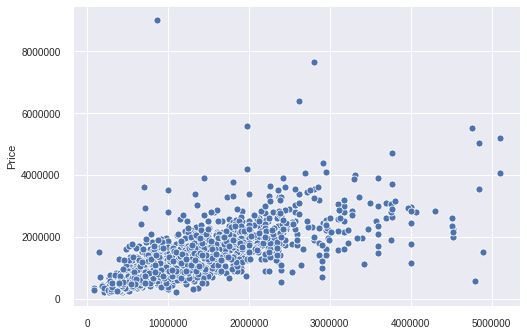

In [12]:
sns.scatterplot(x=val_predictions, y=y_valid)

# Random forest


In [13]:
model2 = RandomForestRegressor(random_state=0)
model2.fit(x_train, y_train)
preds = model2.predict(x_valid)
print(mean_absolute_error(y_valid, preds))

171371.23869345678


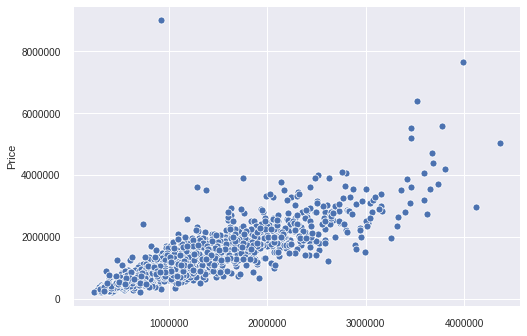

In [14]:
sns.scatterplot(x=preds, y=y_valid)

# Neaural network (Fast.ai tabular)